<a href="https://colab.research.google.com/github/faznafathima/__PROJECTS__/blob/main/time_series_forecasting_arima_lstm_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting LSTM


---



In [1]:
import numpy as np
import pandas as pd
import os                      
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.


# FORECAST

## Read Dataset

In [5]:
df = pd.read_csv(r'/content/drive/MyDrive/monthly-beer-production-in-austr.csv')
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [6]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [8]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [9]:
df.Month = pd.to_datetime(df.Month)

In [10]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [11]:
df.index.freq = 'MS'

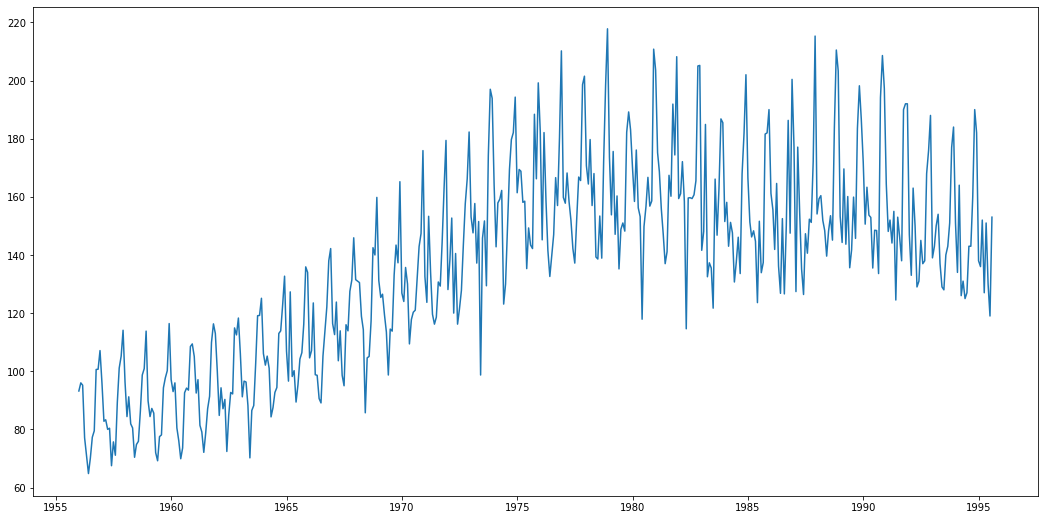

In [12]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

## LSTM Forecast

spliting into train and test data

In [15]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

train and test data with MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
lstm_model.fit_generator(generator,epochs=10)

Epoch 1/10
  4/452 [..............................] - ETA: 8s - loss: 0.0096 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


452/452 [==============================] - 7s 15ms/step - loss: 0.0081
Epoch 2/10
452/452 [==============================] - 5s 11ms/step - loss: 0.0077
Epoch 3/10
452/452 [==============================] - 5s 11ms/step - loss: 0.0071
Epoch 4/10
452/452 [==============================] - 5s 11ms/step - loss: 0.0067
Epoch 5/10
452/452 [==============================] - 5s 11ms/step - loss: 0.0069
Epoch 6/10
452/452 [==============================] - 5s 11ms/step - loss: 0.0078
Epoch 7/10
452/452 [==============================] - 9s 20ms/step - loss: 0.0065
Epoch 8/10
452/452 [==============================] - 5s 11ms/step - loss: 0.0061
Epoch 9/10
452/452 [==============================] - 7s 15ms/step - loss: 0.0067
Epoch 10/10
452/452 [==============================] - 5s 12ms/step - loss: 0.0064


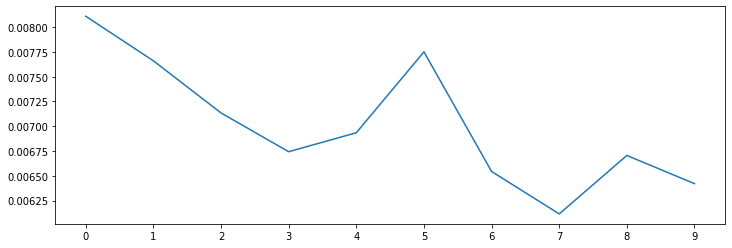

In [22]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [23]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step



As the data is now scaled, inversing the data to see true predictions

In [24]:
lstm_predictions_scaled

[array([0.5857286], dtype=float32),
 array([0.6799402], dtype=float32),
 array([0.8216731], dtype=float32),
 array([0.8288767], dtype=float32),
 array([0.6383378], dtype=float32),
 array([0.59190184], dtype=float32),
 array([0.6698198], dtype=float32),
 array([0.49828786], dtype=float32),
 array([0.49735206], dtype=float32),
 array([0.4706617], dtype=float32),
 array([0.49465612], dtype=float32),
 array([0.58509916], dtype=float32)]

In [25]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [26]:
lstm_predictions

array([[154.41647362],
       [168.83085423],
       [190.51598357],
       [191.61813115],
       [162.46568202],
       [155.36098133],
       [167.28242515],
       [141.03804206],
       [140.89486574],
       [136.81124007],
       [140.48238571],
       [154.32017158]])

In [27]:
test_data['LSTM_Predictions'] = lstm_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
test_data

,Monthly beer production,LSTM_Predictions
Month,,
1994-09-01,143.0,154.416474
1994-10-01,160.0,168.830854
1994-11-01,190.0,190.515984
1994-12-01,182.0,191.618131
1995-01-01,138.0,162.465682
1995-02-01,136.0,155.360981
1995-03-01,152.0,167.282425
1995-04-01,127.0,141.038042
1995-05-01,151.0,140.894866


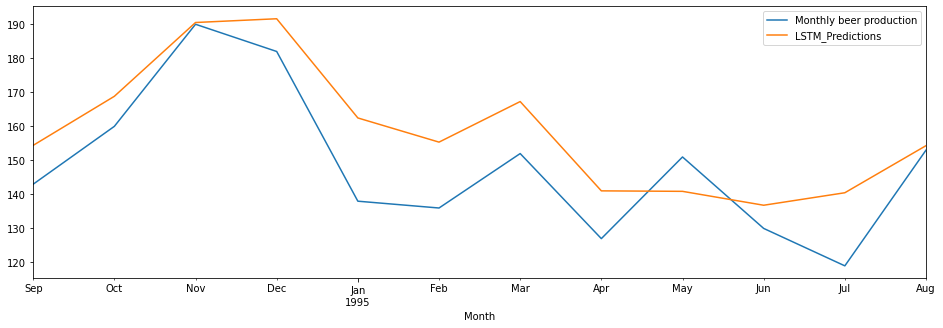

In [29]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [30]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 193.0727798912949
RMSE Error: 13.89506314815787
Mean: 136.3953781512605




---



---

